# Sentiment Analysis Using Various ML Classifiers ans well as using Recurrent Neural Network

### In this notebook you will see text precessing on twitter data set and after that I have performed different Machine Learning Algorithms on the data such as **Logistic Regression, RandomForestClassifier, SVC, Naive Bayes** to classifiy positive and negative tweets. After that I have also built a RNN network which is the best fit for such textual sentiment analysis, since it's a Sequential Dataset which is requirement for RNN network.

#### Let's Dive into it.

# Index

* <a href="#1" style="color: blue;">Importing Libraries</a>
* <a href="#2" style="color: blue;">Loading Dataset</a>
* <a href="#3" style="color: blue;">Data Visualization</a>
* <a href="#4" style="color: blue;">Data Preprocessing</a>
* <a href="#5" style="color: blue;">Analyzing the Data</a>
* <a href="#6" style="color: blue;">Vectorization and Splitting the data</a>
* <a href="#7" style="color: blue;">Model Building</a>
* <a href="#8" style="color: blue;">Logistic Regression</a>
* <a href="#9" style="color: blue;">Linear SVM</a>
* <a href="#10" style="color: blue;">Random Forest</a>
* <a href="#11" style="color: blue;">Naive Bayes</a>
* <a href="#12" style="color: blue;">RNN</a>
* <a href="#13" style="color: blue;">Model Saving, Loading and Prediction</a>

# Importing libraries <a id="1"></a>

In [1]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


# Utility
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset <a id="2"></a>

In [2]:
# Construct a tf.data.Dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

# Data Visualization <a id="3"></a>

Dataset details
target: the polarity of the tweet (0 = negative, 4 = positive)

* date : the date of the tweet (Sat May 16 23:58:44 PDT 2009)
* polarity : the polarity of the tweet (0 = negative 4 = positive)
* user : the user that tweeted (TerraScene)
* text : the text of the tweet (i'm 10x cooler than all of you)

In [3]:
print("Dataset shape:", data.shape)

Dataset shape: (1600000, 6)


In [4]:
data.head(10)

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [5]:
data['polarity'].unique()

array([0, 4])

In [6]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         1600000
No. of positve tagged sentences is:  800000
No. of negative tagged sentences is: 800000


In [8]:
# get a word count per of text
def word_count(words):
    return len(words.split())

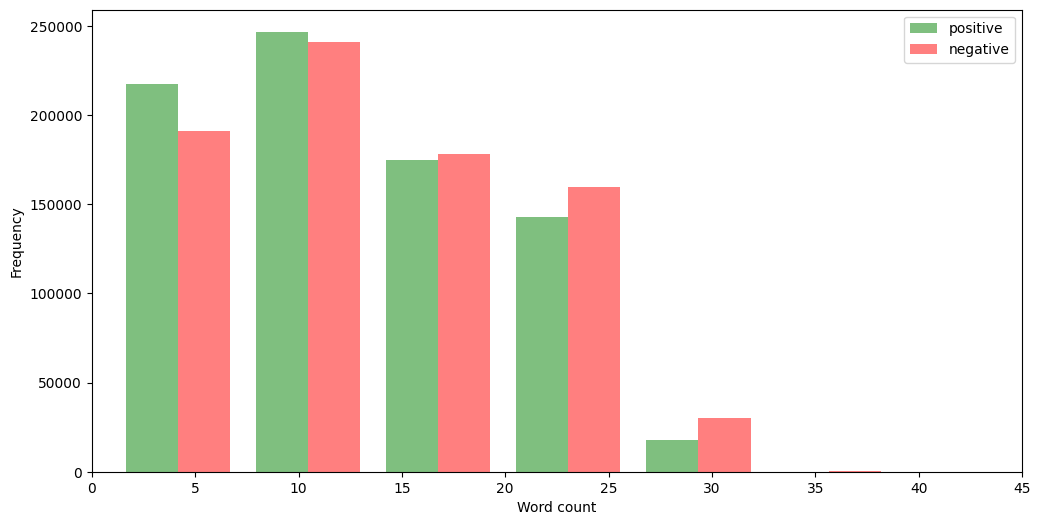

In [9]:
# plot word count distribution for both positive and negative 

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [10]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 518734),
 ('and', 295675),
 ('you', 237766),
 ('for', 214051),
 ('have', 143295),
 ('that', 128775),
 ("i'm", 127616),
 ('but', 124676),
 ('just', 124454),
 ('with', 113488),
 ('was', 102742),
 ('not', 102160),
 ('this', 88151),
 ('get', 80943),
 ('good', 77367),
 ('are', 75994),
 ('like', 75424),
 ('all', 74076),
 ('out', 68953),
 ('your', 64854)]

# Data Processing <a id="4"></a>

<Axes: xlabel='polarity', ylabel='count'>

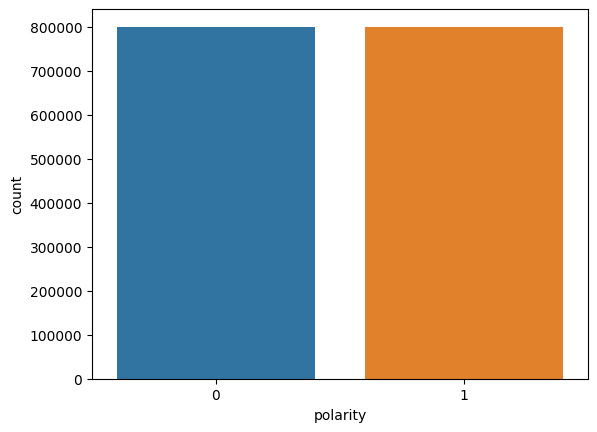

In [11]:
%matplotlib inline
sns.countplot(x='polarity', data=data)

In [12]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [13]:
data.drop('id', axis=1, inplace=True)

In [14]:
data.head(10)

,polarity,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [15]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [16]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [17]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'out', 'now', 'not', 'it', 'each', "needn't", 'only', 'few', 'he', 'y', 'from', "wouldn't", "you'd", "you've", 'is', 'once', 'don', 'do', 'at', 'no', 'ours', 'wouldn', 'that', 'during', 'my', 'yourselves', 'some', "couldn't", 'for', 'aren', 'both', 'i', 'yourself', 'haven', 'does', 'am', 'weren', 'him', 'this', 'll', 'having', 'further', 'against', 'between', "hadn't", 'before', 'where', 'such', 'below', 'an', 's', 'did', 'shan', 'hasn', 'so', 'shouldn', "weren't", "that'll", 'themselves', "should've", 'than', 'these', 'himself', 'again', 'have', "she's", 'your', 'were', 'any', 'most', 'm', 'while', 'other', 'mustn', "wasn't", 'd', 'because', "won't", 'as', 'hadn', 'won', 'we', 'all', 'she', 'was', 'doesn', 'mightn', 'its', 're', 'the', 'needn', 'to', 'wasn', 'you', 'couldn', "you're", 'what', "mustn't", 'through', 'there', 'herself', "shouldn't", "mightn't", 'can', 'of', 'doing', 'too', 'after', 'our', "aren't", 'theirs', 'being', 'a', 'been', 'own', 'ain', 'with', 'who', 'hers', 'be

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


In [18]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


False

> The Preprocessing steps taken are:

* Lower Casing: Each text is converted to lowercase.
* Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

* Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")
* Removing Short Words: Words with length less than 2 are removed.
* Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
* Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [19]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [20]:
%%time
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.
CPU times: user 1min 51s, sys: 278 ms, total: 1min 51s
Wall time: 1min 51s


In [21]:
data.drop('text', axis=1, inplace=True)

In [22]:
data.head(10)

,polarity,processed_tweets
0,0,switchfoot awww thats bummer shoulda got david...
1,0,upset cant update facebook texting might cry r...
2,0,kenichan dived many time ball managed save 50 ...
3,0,whole body feel itchy like fire
4,0,nationwideclass behaving im mad cant see
5,0,kwesidei whole crew
6,0,eed hug
7,0,loltrish hey long time see yes rain bit bit lo...
8,0,tatianak nope didnt
9,0,twittera que muera


# Analyzing the data <a id="5"></a>

> #### Now we're going to analyse the preprocessed data to get an understanding of it. We'll plot Word Clouds for Positive and Negative tweets from our dataset and see which words occur the most.

### Word-Cloud for Negative tweets.

In [23]:
count = data['processed_tweets'].apply(lambda x: len(x.split()) < 5).sum()
print(count)

406942


In [27]:
df=data.drop(data[data['processed_tweets'].apply(lambda x: len(x.split()) < 5)].index)
df.head(10)

df=df.reset_index()
df=df.drop(['index'], axis=1)

In [29]:
df.head(10)

,polarity,processed_tweets
0,0,switchfoot awww thats bummer shoulda got david...
1,0,upset cant update facebook texting might cry r...
2,0,kenichan dived many time ball managed save 50 ...
3,0,whole body feel itchy like fire
4,0,nationwideclass behaving im mad cant see
5,0,loltrish hey long time see yes rain bit bit lo...
6,0,pring break plain city snowing
7,0,caregiving couldnt bear watch thought ua loss ...
8,0,octolinz16 count idk either never talk anymore
9,0,smarrison wouldve first didnt gun really thoug...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193058 entries, 0 to 1193057
Data columns (total 2 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   polarity          1193058 non-null  int64 
 1   processed_tweets  1193058 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.2+ MB


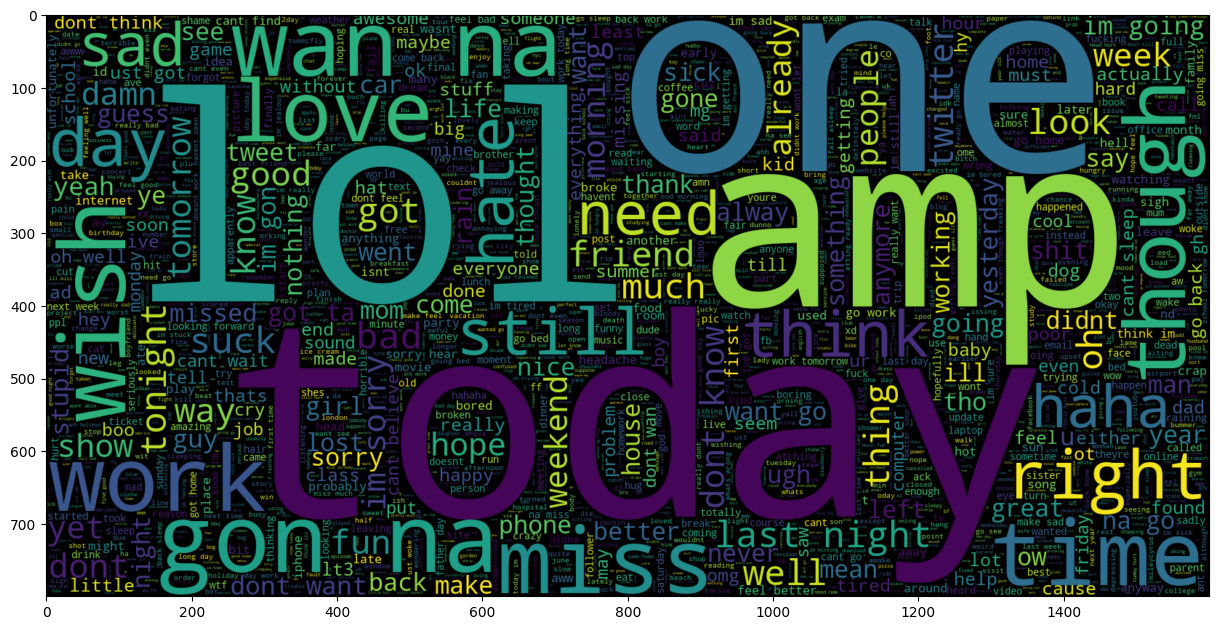

In [31]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

### Word-Cloud for Positive tweets.

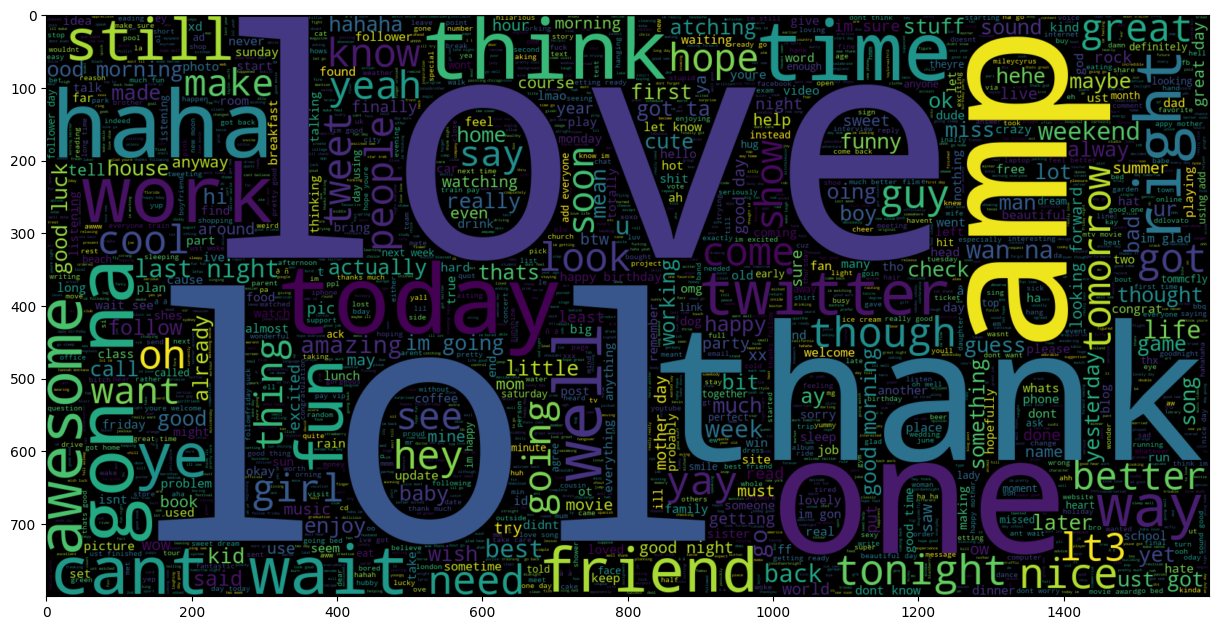

In [32]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

## Vectorization and Splitting the data <a id="6"></a>
Storing input variable-processes_tweets to X and output variable-polarity to y

In [39]:
X = df['processed_tweets']
y = df['polarity'].values

In [40]:
print(X.shape)
print(y.shape)

(1193058,)
(1193058,)


## Convert text to word frequency vectors
### TF-IDF
 This is an acronym than stands for **Term Frequency – Inverse Document** Frequency which are the components of the resulting scores assigned to each word.

* Term Frequency: This summarizes how often a given word appears within a document.
* Inverse Document Frequency: This downscales words that appear a lot across documents.

In [41]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names_out()))

Vector fitted.
No. of feature_words:  666584


In [42]:
print(X.shape)
print(y.shape)

(1193058, 666584)
(1193058,)


## Split train and test

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.




In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [44]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (954446, 666584)
y_train (954446,)

X_test (238612, 666584)
y_test (238612,)


# Model Building <a id="7"></a>

### Model evaluating function

In [45]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    return y_pred

### ROC-AUC

In [46]:
def roc_auc(y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()

### Logistic Regression <a id="8"></a>

Accuracy of model on training data : 81.5730800904399
Accuracy of model on testing data : 77.81922116238916 

              precision    recall  f1-score   support

           0       0.79      0.76      0.78    120484
           1       0.77      0.79      0.78    118128

    accuracy                           0.78    238612
   macro avg       0.78      0.78      0.78    238612
weighted avg       0.78      0.78      0.78    238612



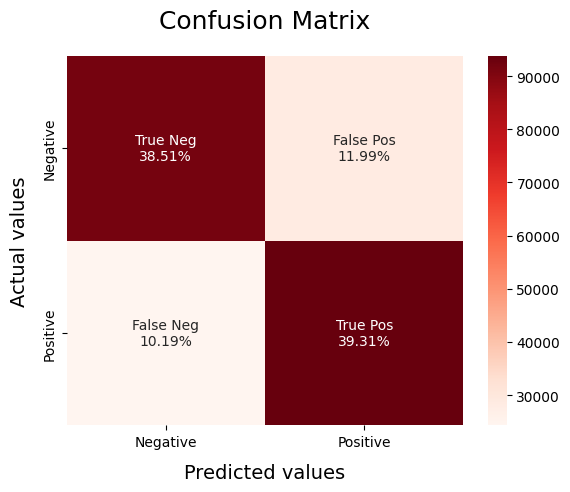

In [47]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
y_pred=model_Evaluate(lg)

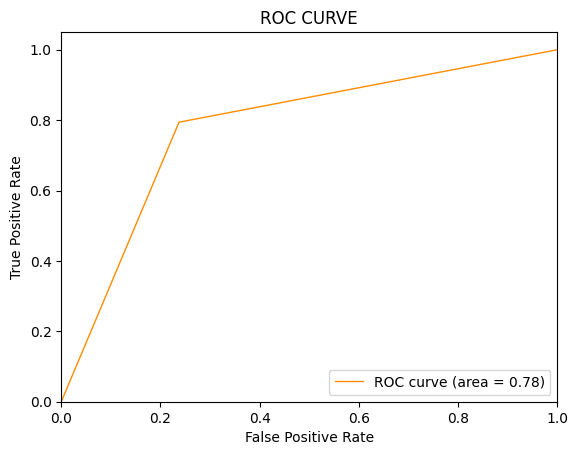

In [48]:
roc_auc(y_pred)

### Linear SVM <a id="9"></a>

Accuracy of model on training data : 89.50417310146409
Accuracy of model on testing data : 76.89680317838165 

              precision    recall  f1-score   support

           0       0.78      0.76      0.77    120484
           1       0.76      0.78      0.77    118128

    accuracy                           0.77    238612
   macro avg       0.77      0.77      0.77    238612
weighted avg       0.77      0.77      0.77    238612



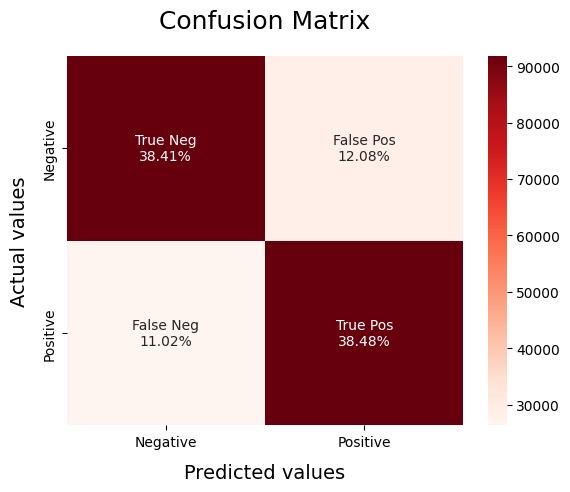

In [49]:
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred=model_Evaluate(svm)

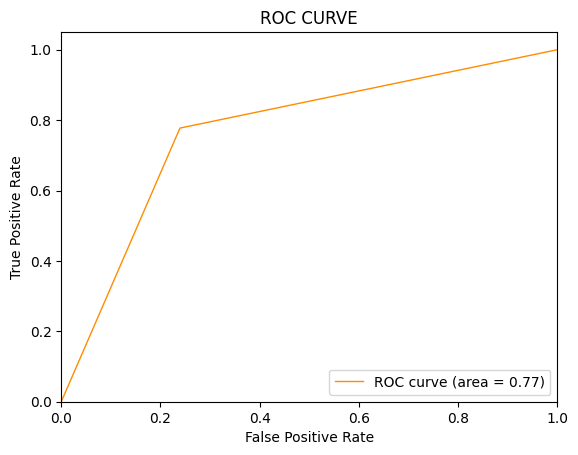

In [50]:
roc_auc(y_pred)

### Random Forest <a id="10"></a>

Accuracy of model on training data : 71.01386563514332
Accuracy of model on testing data : 69.33264043719511 

              precision    recall  f1-score   support

           0       0.68      0.74      0.71    120484
           1       0.71      0.64      0.67    118128

    accuracy                           0.69    238612
   macro avg       0.69      0.69      0.69    238612
weighted avg       0.69      0.69      0.69    238612



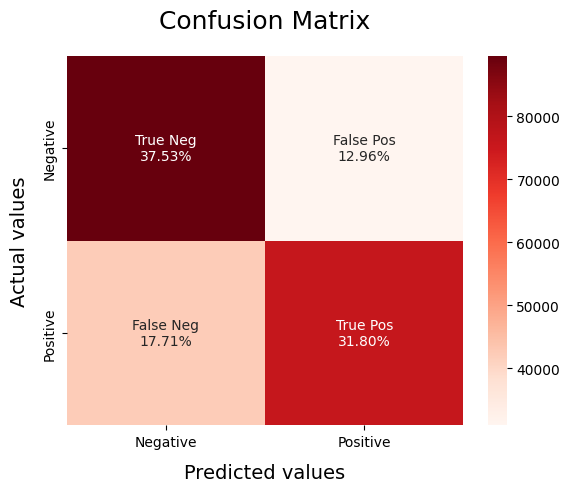

In [51]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
y_pred=model_Evaluate(rf)

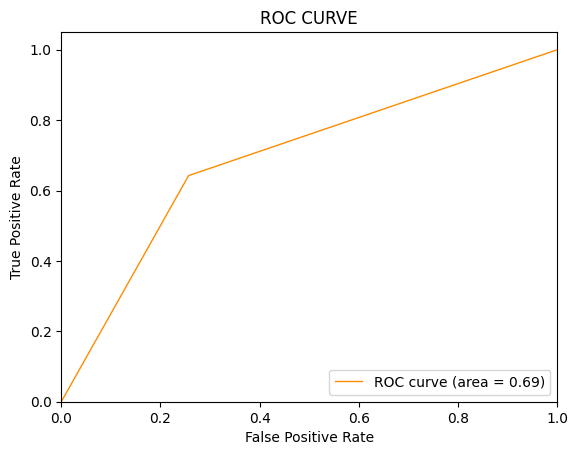

In [52]:
roc_auc(y_pred)

### Naive Bayes <a id="11"></a>

Accuracy of model on training data : 83.60724441194158
Accuracy of model on testing data : 76.44418553970462 

              precision    recall  f1-score   support

           0       0.75      0.79      0.77    120484
           1       0.78      0.74      0.76    118128

    accuracy                           0.76    238612
   macro avg       0.77      0.76      0.76    238612
weighted avg       0.76      0.76      0.76    238612



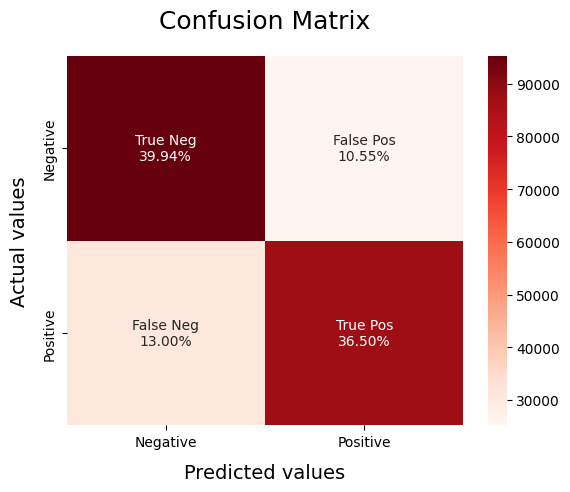

In [53]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred=model_Evaluate(nb)

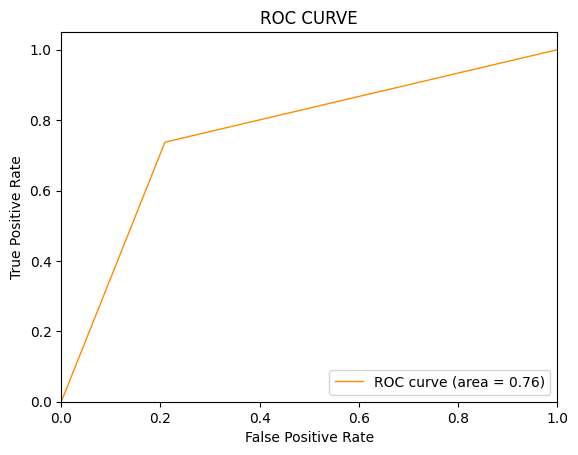

In [54]:
roc_auc(y_pred)

# RNN <a id="12"></a>

#### What is RNN?
Recurrent neural networks (RNN) are the state of the art algorithm for sequential data and are used by Apple's Siri and and Google's voice search. It is the first algorithm that remembers its input, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data

#### Embedding Layer
Embedding layer is one of the available layers in Keras. This is mainly used in Natural Language Processing related applications such as language modeling, but it can also be used with other tasks that involve neural networks. While dealing with NLP problems, we can use pre-trained word embeddings such as GloVe. Alternatively we can also train our own embeddings using Keras embedding layer.

#### LSTM layer
Long Short Term Memory networks, usually called “LSTMs” , were introduced by Hochreiter and Schmiduber. These have widely been used for speech recognition, language modeling, sentiment analysis and text prediction. Before going deep into LSTM, we should first understand the need of LSTM which can be explained by the drawback of practical use of Recurrent Neural Network (RNN). So, lets start with RNN.

In [55]:
import keras
keras.__version__

'2.13.1'

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
#from keras.utils.np_utils import to_categorical

In [57]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.processed_tweets)
sequences = tokenizer.texts_to_sequences(data.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  759 1865    2]
 [   0    0    0 ...   11  187 1283]
 [   0    0    0 ...  368    6 3132]
 ...
 [   0    0    0 ...  123  504 1746]
 [   0    0    0 ...  415 4997   12]
 [   0    0    0 ...    0    0  458]]


In [65]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

In [67]:
model2 = Sequential()
model2.add(Embedding(max_words, 128))
model2.add(LSTM(64,dropout=0.5))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])


Epoch 1/10
40000/40000 [==============================] - ETA: 0s - loss: 0.4724 - accuracy: 0.7729
Epoch 1: val_accuracy improved from -inf to 0.78255, saving model to rnn_model.hdf5
40000/40000 [==============================] - 2735s 68ms/step - loss: 0.4724 - accuracy: 0.7729 - val_loss: 0.4557 - val_accuracy: 0.7826
Epoch 2/10
40000/40000 [==============================] - ETA: 0s - loss: 0.4525 - accuracy: 0.7856
Epoch 2: val_accuracy improved from 0.78255 to 0.78553, saving model to rnn_model.hdf5
40000/40000 [==============================] - 2705s 68ms/step - loss: 0.4525 - accuracy: 0.7856 - val_loss: 0.4516 - val_accuracy: 0.7855
Epoch 3/10
40000/40000 [==============================] - ETA: 0s - loss: 0.4467 - accuracy: 0.7889
Epoch 3: val_accuracy improved from 0.78553 to 0.78686, saving model to rnn_model.hdf5
40000/40000 [==============================] - 2685s 67ms/step - loss: 0.4467 - accuracy: 0.7889 - val_loss: 0.4495 - val_accuracy: 0.7869
Epoch 4/10
40000/40000 [=

In [68]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')
# print(pred)

1/1 [==============================] - 0s 217ms/step
Negative


In [69]:
model = keras.models.load_model('rnn_model.hdf5')
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 133ms/step
Positive


In [70]:
sequence = tokenizer.texts_to_sequences(['I had a bad day at work.'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 18ms/step
Negative


In [1]:
# DataFrame
import pandas as pd

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
# DATASET
TRAIN_SIZE = 0.8

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "rnn_lstm_gensim.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

### Dataset details
* **polarity**: the polarity of the tweet (0 = negative, 1 = positive)
* **processed_tweets**: the text of the tweet (Lyx is cool)

In [3]:
df = pd.read_csv('processed_dataset.csv')

In [4]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 954446
TEST size: 238612


### Word2Vec 

In [5]:
%%time
documents = [_text.split() for _text in df_train.processed_tweets] 

CPU times: user 1.7 s, sys: 80.4 ms, total: 1.78 s
Wall time: 1.77 s


In [6]:
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE,
                                            window=W2V_WINDOW,
                                            min_count=W2V_MIN_COUNT,
                                            workers=8)

2023-08-28 03:44:52,605 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=300, alpha=0.025>', 'datetime': '2023-08-28T03:44:52.605319', 'gensim': '4.3.2', 'python': '3.9.8 (v3.9.8:bb3fdcfe95, Nov  5 2021, 16:40:46) \n[Clang 13.0.0 (clang-1300.0.29.3)]', 'platform': 'macOS-13.2.1-arm64-arm-64bit', 'event': 'created'}


In [7]:
w2v_model.build_vocab(documents)

2023-08-28 03:44:52,607 : INFO : collecting all words and their counts
2023-08-28 03:44:52,608 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-08-28 03:44:52,618 : INFO : PROGRESS: at sentence #10000, processed 92048 words, keeping 20642 word types
2023-08-28 03:44:52,631 : INFO : PROGRESS: at sentence #20000, processed 184673 words, keeping 33954 word types
2023-08-28 03:44:52,644 : INFO : PROGRESS: at sentence #30000, processed 276249 words, keeping 45552 word types
2023-08-28 03:44:52,658 : INFO : PROGRESS: at sentence #40000, processed 368198 words, keeping 56405 word types
2023-08-28 03:44:52,672 : INFO : PROGRESS: at sentence #50000, processed 460502 words, keeping 66425 word types
2023-08-28 03:44:52,686 : INFO : PROGRESS: at sentence #60000, processed 552614 words, keeping 75931 word types
2023-08-28 03:44:52,700 : INFO : PROGRESS: at sentence #70000, processed 644786 words, keeping 85052 word types
2023-08-28 03:44:52,714 : INFO : PROGRESS: at s

In [8]:
words = w2v_model.wv.key_to_index.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 31812


In [9]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

2023-08-28 03:44:54,581 : INFO : Word2Vec lifecycle event {'msg': 'training model with 8 workers on 31812 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=7 shrink_windows=True', 'datetime': '2023-08-28T03:44:54.581903', 'gensim': '4.3.2', 'python': '3.9.8 (v3.9.8:bb3fdcfe95, Nov  5 2021, 16:40:46) \n[Clang 13.0.0 (clang-1300.0.29.3)]', 'platform': 'macOS-13.2.1-arm64-arm-64bit', 'event': 'train'}
2023-08-28 03:44:55,595 : INFO : EPOCH 0 - PROGRESS: at 17.27% examples, 1274664 words/s, in_qsize 15, out_qsize 0
2023-08-28 03:44:56,606 : INFO : EPOCH 0 - PROGRESS: at 33.66% examples, 1235334 words/s, in_qsize 16, out_qsize 0
2023-08-28 03:44:57,609 : INFO : EPOCH 0 - PROGRESS: at 51.26% examples, 1255729 words/s, in_qsize 15, out_qsize 0
2023-08-28 03:44:58,612 : INFO : EPOCH 0 - PROGRESS: at 69.10% examples, 1270402 words/s, in_qsize 14, out_qsize 1
2023-08-28 03:44:59,627 : INFO : EPOCH 0 - PROGRESS: at 86.93% examples, 1275952 words/s, in_qsize 13, out_qsize

CPU times: user 15min 41s, sys: 6.02 s, total: 15min 47s
Wall time: 3min 8s


(236370255, 281481216)

In [10]:
w2v_model.wv.similar_by_word("love")

[('luv', 0.5713028311729431),
 ('adore', 0.5603258013725281),
 ('lt3', 0.5220027565956116),
 ('loved', 0.5197451710700989),
 ('loove', 0.4922264814376831),
 ('lovee', 0.48110431432724),
 ('amazing', 0.4789758026599884),
 ('â\x99¥', 0.47210797667503357),
 ('ove', 0.44180262088775635),
 ('looove', 0.43970316648483276)]

### Tokenize Text

In [11]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.processed_tweets)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 575100
CPU times: user 8.2 s, sys: 1.44 s, total: 9.64 s
Wall time: 7.93 s


In [12]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.processed_tweets), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.processed_tweets), maxlen=SEQUENCE_LENGTH)

CPU times: user 9.7 s, sys: 632 ms, total: 10.3 s
Wall time: 10.7 s


In [13]:
y_train = df_train.polarity
y_test = df_test.polarity

### Embedding layer

In [14]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(575100, 300)


In [15]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

### Build Model

In [16]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          172530000 
                                                                 
 dropout (Dropout)           (None, 300, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 172690501 (658.76 MB)
Trainable params: 160501 (626.96 KB)
Non-trainable params: 172530000 (658.15 MB)
_________________________________________________________________


### Compile model

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

### Callbacks

In [18]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

### Train

In [ ]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
122/839 [===>..........................] - ETA: 40:47 - loss: 0.5635 - accuracy: 0.7044

### Evaluate

In [ ]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

### Predict

In [ ]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [ ]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [ ]:
predict("I love the music")

In [ ]:
predict("I hate the rain")

### Confusion Matrix

In [ ]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [ ]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.target.unique(), title="Confusion matrix")
plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test_1d, y_pred_1d))

### Accuracy Score

In [ ]:
accuracy_score(y_test_1d, y_pred_1d)

### Save model

In [ ]:
model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

# Model Saving, Loading and Prediction <a id="13"></a>

In [71]:
file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle','wb')
pickle.dump(lg, file)
file.close()

file = open('SVM.pickle','wb')
pickle.dump(svm, file)
file.close()

file = open('RandomForest.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()

### Predict using saved model

In [72]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg

In [73]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [74]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, lg = load_models()
    
    # Text to classify should be in a list.
    text = ["I love machine learning",
            "Work is too hectic.",
            "Mr.Sharama, I feel so good"]
    
    df = predict(vectoriser, lg, text)
    print(df.head())


                         text sentiment
0     I love machine learning  Positive
1         Work is too hectic.  Negative
2  Mr.Sharama, I feel so good  Positive
